In [ ]:
import paddle
import numpy as np
from paddle.vision.transforms import Normalize

transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')
# 下载数据集并初始化 DataSet
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

In [ ]:
# 模型组网并初始化网络
lenet = paddle.vision.models.LeNet(num_classes=10)
model = paddle.Model(lenet)

# 可视化模型组网结构和参数
paddle.summary(lenet,(1, 1, 28, 28))

In [2]:
# 模型训练的配置准备，准备损失函数，优化器和评价指标
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()), 
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())

# 模型训练
model.fit(train_dataset, epochs=5, batch_size=64, verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5


/home/chendian/.conda/envs/bbcm/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:77: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  return (isinstance(seq, collections.Sequence) and


step 938/938 [==============================] - loss: 0.0117 - acc: 0.9411 - 21ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0095 - acc: 0.9773 - 21ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.0083 - acc: 0.9819 - 21ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 0.0026 - acc: 0.9848 - 23ms/step          
Epoch 5/5
step 938/938 [==============================] - loss: 0.0270 - acc: 0.9869 - 21ms/step          


In [3]:
# 模型评估
model.evaluate(test_dataset, batch_size=64, verbose=1)

Eval begin...
step 157/157 [==============================] - loss: 1.7398e-05 - acc: 0.9861 - 11ms/step        
Eval samples: 10000


{'loss': [1.7397826e-05], 'acc': 0.9861}

In [ ]:
# 保存模型
model.save('./output/mnist')

# 加载模型
model.load('output/mnist')

true label: 7, pred label: 7


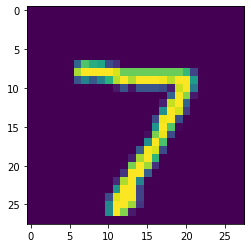

In [4]:
# 从测试集中取出一张图片
img, label = test_dataset[0]

# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print('true label: {}, pred label: {}'.format(label[0], pred_label))

# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])